In [6]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from fbprophet.plot import add_changepoints_to_plot
from pykalman import KalmanFilter
import scipy.stats

In [7]:
import requests

POLONIEX_OHLCV_BASEURL = 'https://poloniex.com/public?command=returnChartData&currencyPair='

"""
https://poloniex.com/public?command=returnChartData&currencyPair=BTC_POT&start=1435699200&end=9999999999&period=14400

"""

def get_ohlcv_poloniex(pair='BTC_ETH', start=1435699200, end=9999999999, period=900):
    """
    returns ohlcv data for poloniex as pandas dataframe
    convert to unix timestamp using https://coderstoolbox.net/unixtimestamp/
    :param pair: str pair on poloniex
    :param start: int unix timestamp of beginning time
    :param end: int unix timestamp of ending time
    :param period: int candle width in seconds
    :return: pandas df of ohlcv data from poloniex for specified pair, times, and period
    """
    query = POLONIEX_OHLCV_BASEURL + pair + '&start=' + str(start) + '&end=' + str(end) + '&period=' + str(period)
    resp = requests.get(query,verify=False)

    if resp.status_code != 200:
        raise requests.ApiError('GET /tasks/ {}'.format(resp.status_code))

    return pd.DataFrame(resp.json())

In [8]:
df = get_ohlcv_poloniex(pair='USDT_BTC', start=1483600958, end=9999999999, period=900)
#no option to pass in 3600 sec candles
df['ds'] = pd.to_datetime(df['date'], unit='s')
df['y'] = df['volume']
df['logVolume'] = df['volume'].apply(np.log)

/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [9]:
df

,close,date,high,low,open,quoteVolume,volume,weightedAverage,ds,y,logVolume
0,1143.999999,1483601400,1145.000000,1135.000000,1137.020000,9.170638,10475.203351,1142.254643,2017-01-05 07:30:00,10475.203351,9.256766
1,1146.628895,1483602300,1146.628895,1141.242295,1143.999998,21.620561,24698.210829,1142.348302,2017-01-05 07:45:00,24698.210829,10.114486
2,1146.628879,1483603200,1148.561412,1142.000000,1146.628895,21.086122,24164.714141,1146.000865,2017-01-05 08:00:00,24164.714141,10.092649
3,1124.500000,1483604100,1148.799997,1120.000000,1142.000000,98.798854,111593.901661,1129.506029,2017-01-05 08:15:00,111593.901661,11.622622
4,1136.000000,1483605000,1136.000000,1124.018000,1124.500000,23.515077,26504.327610,1127.120601,2017-01-05 08:30:00,26504.327610,10.185063
5,1137.392370,1483605900,1142.156254,1133.000000,1136.000000,13.919882,15811.879906,1135.920575,2017-01-05 08:45:00,15811.879906,9.668517
6,1117.000000,1483606800,1136.960000,1104.474471,1133.020000,128.963717,144286.105281,1118.811621,2017-01-05 09:00:00,144286.105281,11.879553
7,1089.531268,1483607700,1120.000000,1035.000000,1120.000000,416.488036,446640.008453,1072.395772,2017-01-05 09:15:00,446640.008453,13.009508
8,1092.000000,1483608600,1099.232465,1055.291200,1085.000000,229.543299,247051.025497,1076.271998,2017-01-05 09:30:00,247051.025497,12.417350
9,1067.000000,1483609500,1094.990000,1066.872000,1092.000000,225.003248,242152.824725,1076.219241,2017-01-05 09:45:00,242152.824725,12.397324


In [10]:
def fitKCA(t,z,q,fwd=0):
    #Set up Matrices
    h=(t[-1]-t[0])/t.shape[0]
    A=np.array([[1,h,.5*h**2],[0,1,h],[0,0,1]])
    Q=q*np.eye(A.shape[0])
    #2) Apply the filter    
    kf=KalmanFilter(transition_matrices=A,transition_covariance=Q)
    #3) EM estimates
    kf=kf.em(z)
    #4) Smooth 
    x_mean,x_covar=kf.smooth(z)
    #Forecast
    for fwd_ in range(fwd):
        x_mean_,x_covar_=kf.filter_update(filtered_state_mean=x_mean[-1], \
                    filtered_state_covariance=x_covar[-1])
        x_mean=np.append(x_mean,x_mean_.reshape(1,-1),axis=0)
        x_covar_=np.expand_dims(x_covar_,axis=0)
        x_covar=np.append(x_covar,x_covar_,axis=0)
    #std series
    x_std=(x_covar[:,0,0]**.5).reshape(-1,1)
    for i in range(1,x_covar.shape[1]):
        x_std_=x_covar[:,i,i]**.5
        x_std=np.append(x_std,x_std_.reshape(-1,1),axis=1)
    return x_mean,x_std,x_covar

In [11]:
x_mean, x_std, x_covar = fitKCA(df.date.values,df.volume.values,1)

/anaconda3/lib/python3.6/site-packages/pykalman/utils.py:111: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  args = inspect.getargspec(obj.__init__)[0]


In [64]:

# by MLdP on 02/20/2014 <lopezdeprado@lbl.gov>
# Kinetic Component Analysis of a periodic function
import matplotlib.pyplot as pp
mainPath=''
#---------------------------------------------------------
def vsFFT(t,z):
    #3) Fit KCA
    x_point,x_bands=fitKCA(t,z,q=.001)[:2]
    #4) Plot KCA's point estimates
    color=['b','g','r']
    pp.plot(t,z,marker='x',linestyle='',label='measurements')
    pp.plot(t,x_point[:,0],marker='o',linestyle='-',label='position', color=color[0])
    pp.plot(t,x_point[:,1],marker='o',linestyle='-',label='velocity', color=color[1])
    pp.plot(t,x_point[:,2],marker='o',linestyle='-',label='acceleration', color=color[2])
    pp.legend(loc='lower left',prop={'size':8})
    pp.show()
    #5) Plot KCA's confidence intervals (2 std)
    for i in range(x_bands.shape[1]):
        pp.plot(t,x_point[:,i]-2*x_bands[:,i],linestyle='-',color=color[i])
        pp.plot(t,x_point[:,i]+2*x_bands[:,i],linestyle='-',color=color[i])
    pp.legend(loc='lower left',prop={'size':8})
    pp.show()
    pp.clf();pp.close() # reset pylab
    return

In [65]:
df = get_ohlcv_poloniex(pair='USDT_BTC', start=1483600958, end=9999999999, period=900)
df['ds'] = pd.to_datetime(df['date'], unit='s')
df['y'] = df['volume']

/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [66]:

def run(df):
    result = fitKCA(df['date'].values, df['y'].values, 0.01, 0)
    
    df['velocity'] = result[0][:,1]
    df['acceleration'] = result[0][:,2]
    print(df['velocity'].describe())
    print(df['acceleration'].describe())
    
    vsFFT(df['date'].values, df['y'].values)
    
    prophet_df = df[['ds', 'velocity', 'acceleration']].copy()

    prophet_df['y'] = prophet_df['velocity']
    m = Prophet(seasonality_mode='multiplicative')
    m.fit(prophet_df)
    future = m.make_future_dataframe(periods=14)
    future.tail()
    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    fig1 = m.plot(forecast)

    prophet_df['y'] = prophet_df['acceleration']
    m = Prophet(seasonality_mode='multiplicative')
    m.fit(prophet_df)
    future = m.make_future_dataframe(periods=14)
    future.tail()
    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    fig1 = m.plot(forecast)

/anaconda3/lib/python3.6/site-packages/pykalman/utils.py:111: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  args = inspect.getargspec(obj.__init__)[0]


count    59893.000000
mean         0.009164
std        711.712022
min     -13695.162319
25%       -148.659624
50%         -5.670418
75%        124.480332
max      23274.053998
Name: velocity, dtype: float64
count    59893.000000
mean        -0.000029
std          1.207685
min        -27.186906
25%         -0.259389
50%         -0.006664
75%          0.240060
max         30.859417
Name: acceleration, dtype: float64


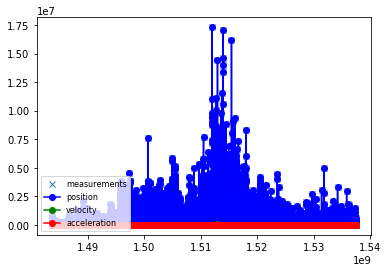

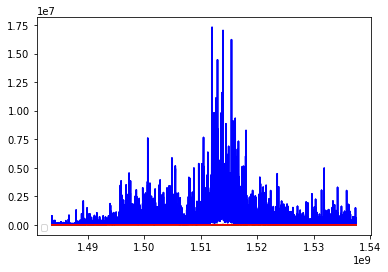

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


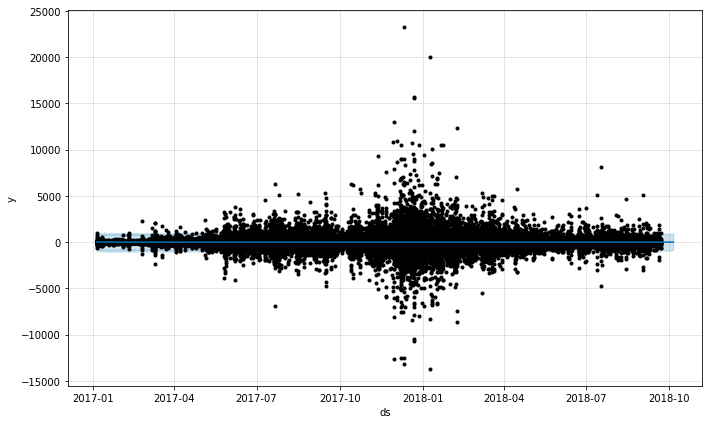

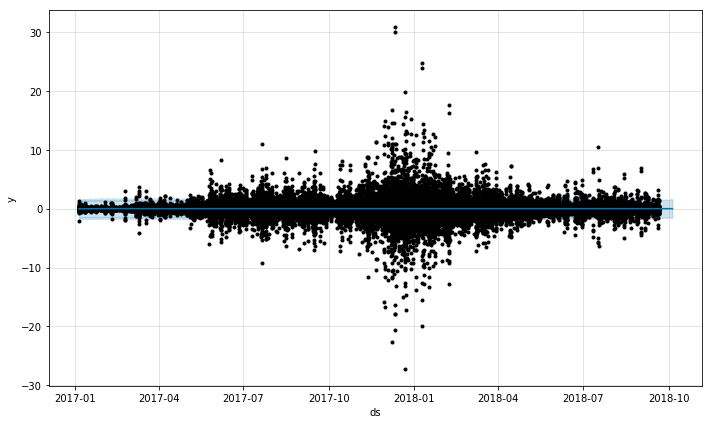

In [67]:
run(df)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/pykalman/utils.py:111: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  args = inspect.getargspec(obj.__init__)[0]


(2017, 1)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt


count    2562.000000
mean        0.216364
std       333.722543
min     -1881.441525
25%      -138.100568
50%         1.846719
75%       142.793092
max      1559.046959
Name: velocity, dtype: float64
count    2562.000000
mean       -0.000315
std         0.746161
min        -3.635407
25%        -0.312471
50%         0.002519
75%         0.318089
max         3.877320
Name: acceleration, dtype: float64


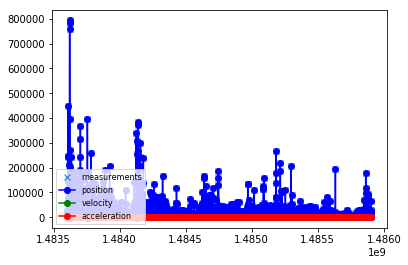

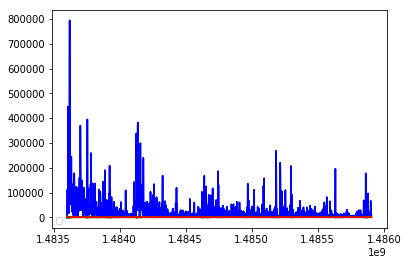

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2017, 2)
count    2688.000000
mean        0.005515
std       121.867326
min     -1934.283962
25%       -23.801947
50%        -0.760717
75%        23.082243
max      2646.400184
Name: velocity, dtype: float64
count    2688.000000
mean        0.000112
std         0.242357
min        -3.205916
25%        -0.049911
50%        -0.000622
75%         0.048886
max         4.362098
Name: acceleration, dtype: float64


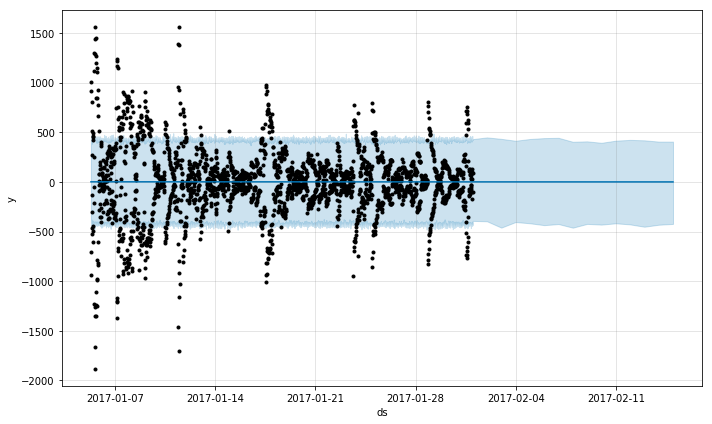

ValueError: view limit minimum -73643123.971875 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

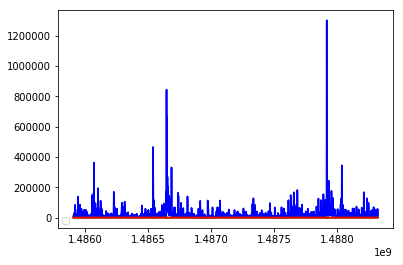

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2017, 3)
count    2976.000000
mean       -0.105649
std       342.734800
min     -3650.323601
25%      -151.208737
50%         0.872627
75%       157.364756
max      2805.574743
Name: velocity, dtype: float64
count    2976.000000
mean       -0.000132
std         0.734230
min        -6.825701
25%        -0.343276
50%         0.005180
75%         0.333626
max         6.735240
Name: acceleration, dtype: float64


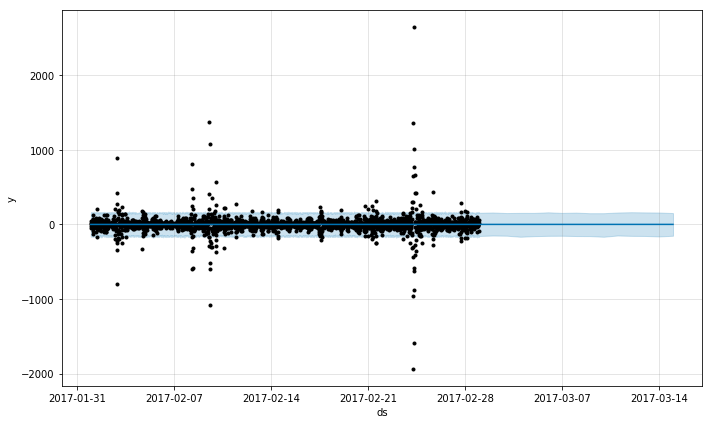

ValueError: view limit minimum -73777015.95 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

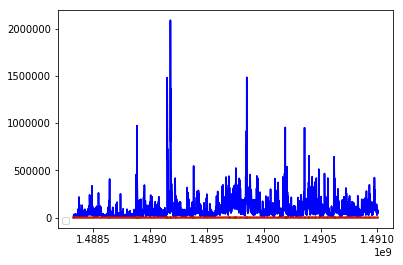

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2017, 4)
count    2880.000000
mean        0.049876
std       243.645585
min     -1889.260768
25%      -104.213367
50%         0.321978
75%       108.556988
max      1769.256707
Name: velocity, dtype: float64
count    2880.000000
mean        0.000260
std         0.521736
min        -3.297961
25%        -0.231724
50%        -0.000215
75%         0.220470
max         4.108512
Name: acceleration, dtype: float64


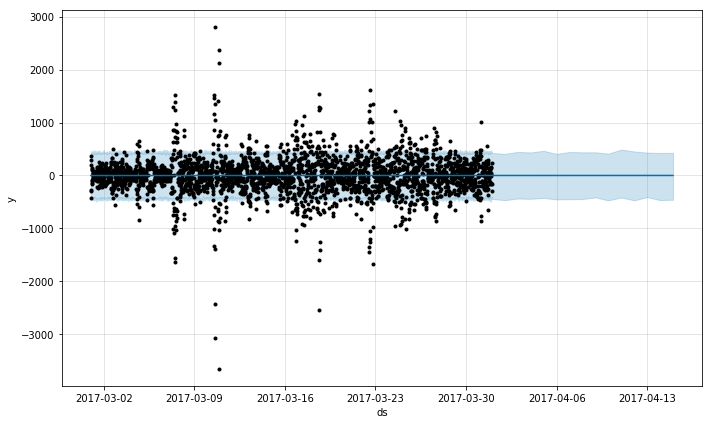

ValueError: view limit minimum -73906586.55 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

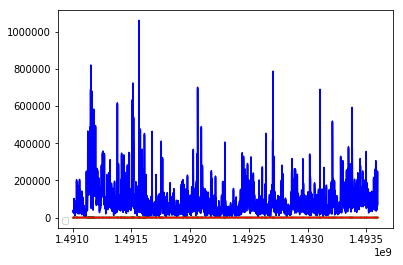

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2017, 5)
count    2976.000000
mean       -0.275366
std      1128.306110
min     -7773.112111
25%      -626.628336
50%        -1.301399
75%       631.207601
max      7451.075344
Name: velocity, dtype: float64
count    2976.000000
mean       -0.001443
std         2.457446
min       -16.707384
25%        -1.369678
50%        -0.012742
75%         1.365275
max        16.971173
Name: acceleration, dtype: float64


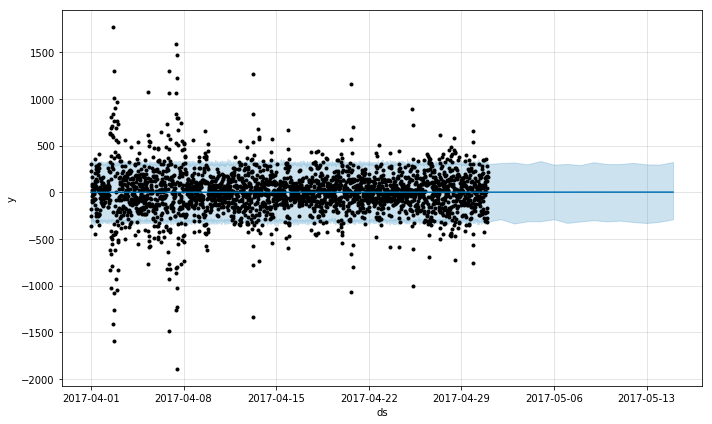

ValueError: view limit minimum -74040474.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

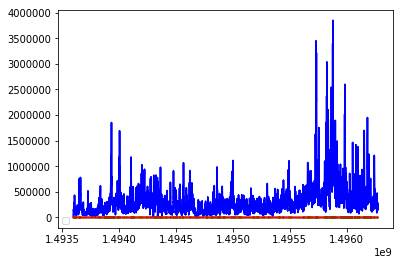

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2017, 6)
count     2880.000000
mean        -0.907119
std       2143.196017
min     -10350.415602
25%      -1190.686962
50%          3.957002
75%       1212.987664
max      10213.611914
Name: velocity, dtype: float64
count    2880.000000
mean        0.001812
std         4.800515
min       -21.933635
25%        -2.722575
50%        -0.018104
75%         2.760636
max        23.297919
Name: acceleration, dtype: float64


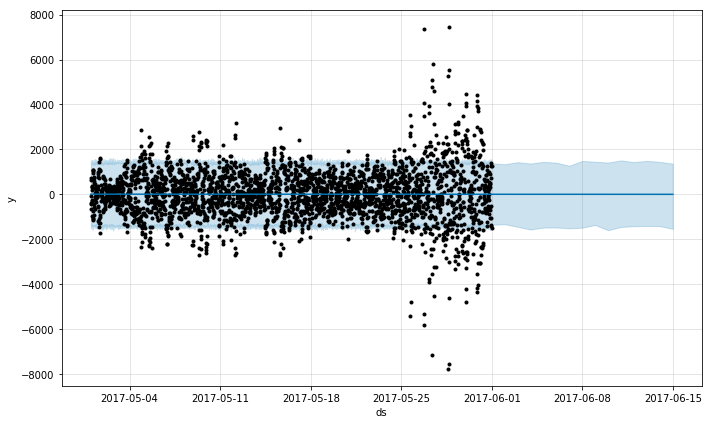

ValueError: view limit minimum -74170042.5 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

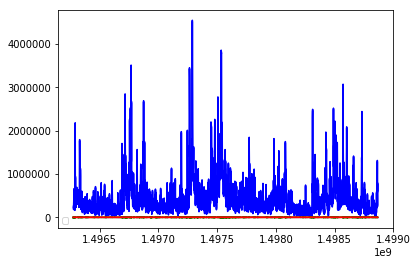

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2017, 7)
count    2976.000000
mean       -0.466409
std       594.084969
min     -7096.121802
25%      -230.603619
50%        -6.305708
75%       219.983962
max      5501.838476
Name: velocity, dtype: float64
count    2976.000000
mean        0.001309
std         1.111079
min       -10.614372
25%        -0.437710
50%        -0.000490
75%         0.428896
max        11.497836
Name: acceleration, dtype: float64


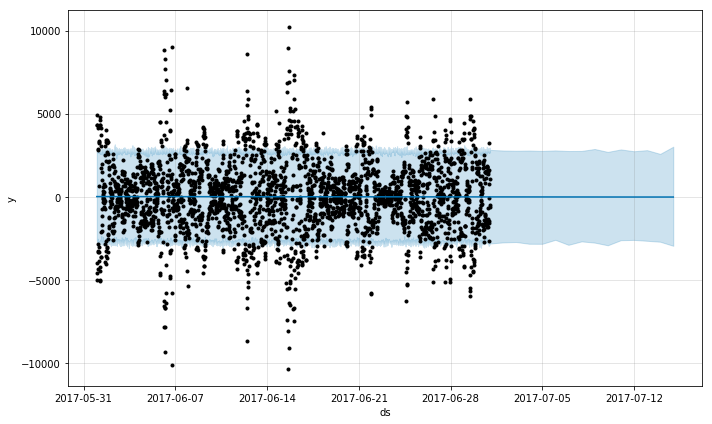

ValueError: view limit minimum -74303929.95 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

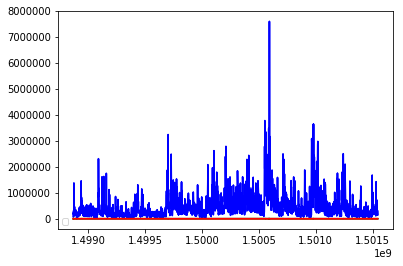

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2017, 8)
count    2976.000000
mean        0.069702
std       791.878636
min     -5089.644101
25%      -337.284842
50%        -8.485197
75%       336.995517
max      6337.373565
Name: velocity, dtype: float64
count    2976.000000
mean       -0.000177
std         1.602843
min       -10.491402
25%        -0.710532
50%        -0.030197
75%         0.699035
max        12.297402
Name: acceleration, dtype: float64


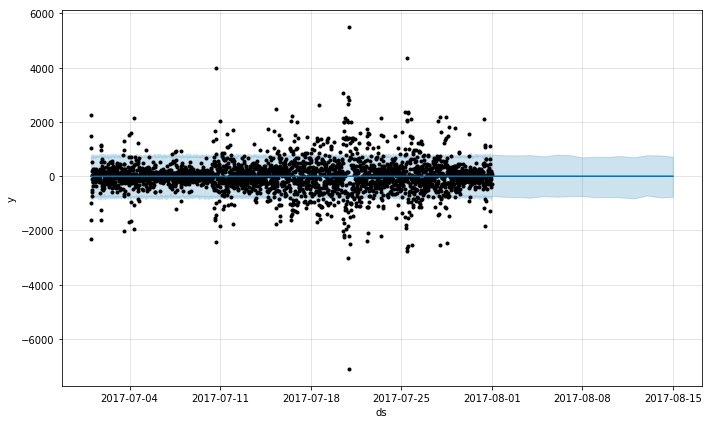

ValueError: view limit minimum -74437818.45 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

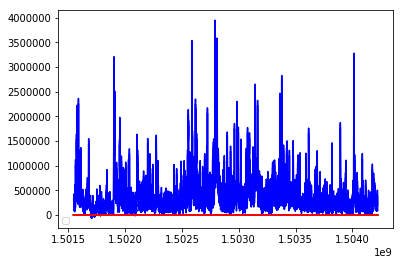

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2017, 9)
count     2880.000000
mean         0.009169
std       1486.290380
min     -12182.183410
25%       -704.981355
50%         11.003227
75%        665.538670
max      10156.589092
Name: velocity, dtype: float64
count    2880.000000
mean       -0.000750
std         3.201594
min       -22.308019
25%        -1.472000
50%        -0.032435
75%         1.478031
max        25.111500
Name: acceleration, dtype: float64


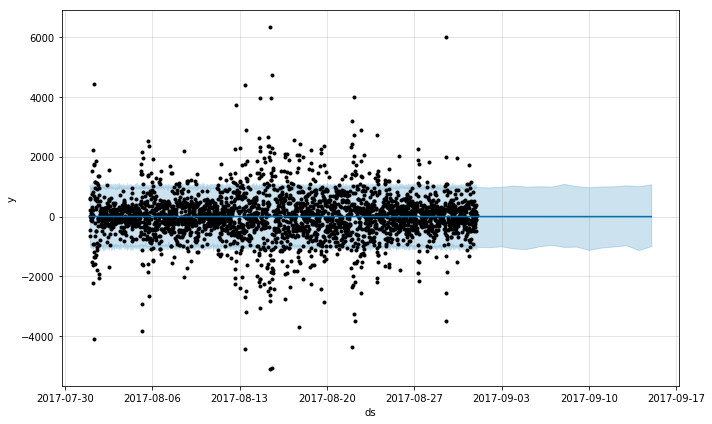

ValueError: view limit minimum -74567385.9 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

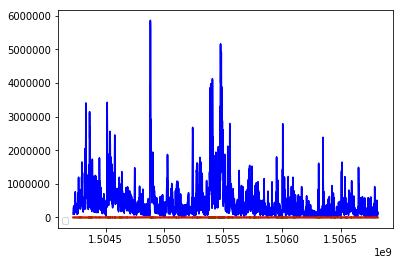

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2017, 10)
count    2976.000000
mean        0.012624
std       418.370677
min     -2961.374962
25%      -138.387432
50%       -15.756990
75%       109.630332
max      5487.621721
Name: velocity, dtype: float64
count    2976.000000
mean        0.001654
std         0.633721
min        -5.300449
25%        -0.225146
50%        -0.006558
75%         0.198922
max         6.023742
Name: acceleration, dtype: float64


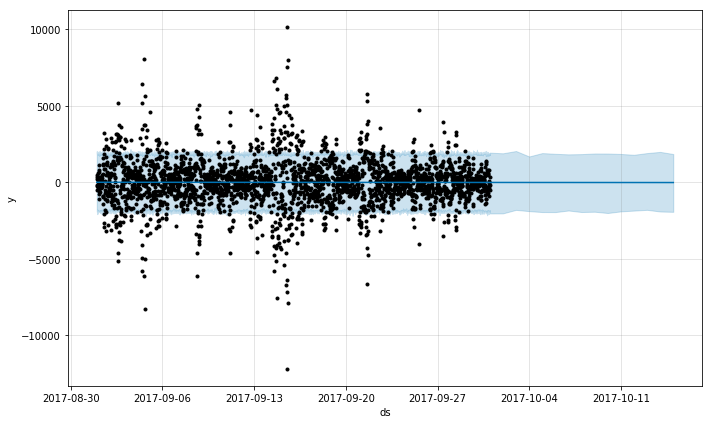

ValueError: view limit minimum -74701273.35000001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

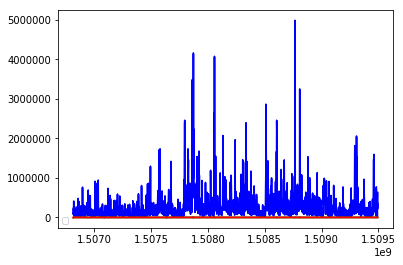

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2017, 11)
count     2880.000000
mean         3.435093
std       8160.041487
min     -47647.803675
25%      -4711.173316
50%         51.354257
75%       4736.521746
max      50247.509014
Name: velocity, dtype: float64
count    2880.000000
mean        0.021950
std        18.081608
min      -105.103683
25%       -10.509556
50%        -0.038992
75%        10.536344
max       108.739849
Name: acceleration, dtype: float64


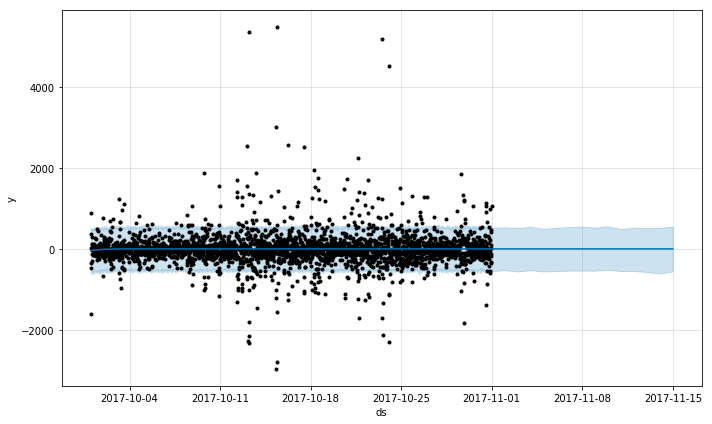

ValueError: view limit minimum -74830841.85000001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

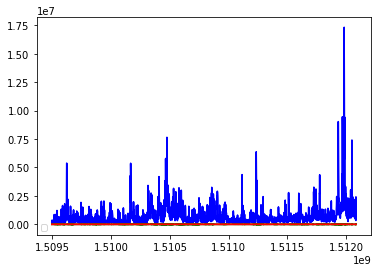

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2017, 12)
count     2976.000000
mean        -2.114452
std       1858.411660
min     -15585.237602
25%       -725.053295
50%        -24.612059
75%        667.101095
max      21049.446394
Name: velocity, dtype: float64
count    2976.000000
mean        0.002495
std         3.478767
min       -27.605030
25%        -1.380515
50%        -0.083590
75%         1.351557
max        35.223555
Name: acceleration, dtype: float64


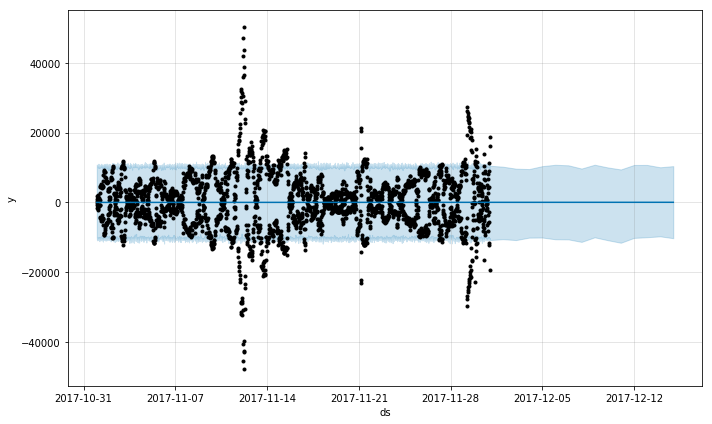

ValueError: view limit minimum -74964729.3 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

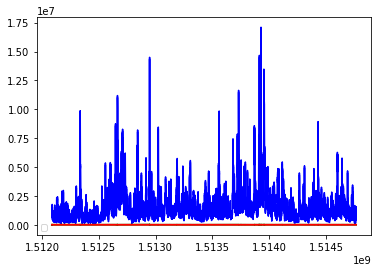

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2018, 1)
count     2976.000000
mean        -1.655102
std       2136.541860
min     -23869.075280
25%       -811.582431
50%         18.828634
75%        876.255200
max      15707.700657
Name: velocity, dtype: float64
count    2976.000000
mean        0.002211
std         4.716630
min       -38.577115
25%        -1.881009
50%         0.001754
75%         1.837877
max        47.305428
Name: acceleration, dtype: float64


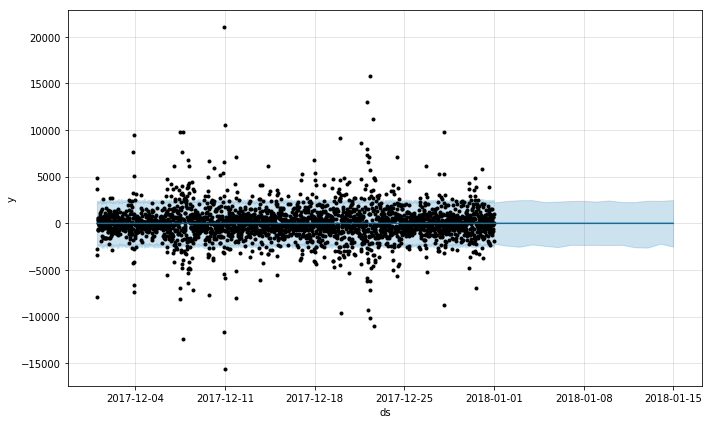

ValueError: view limit minimum -75098617.8 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

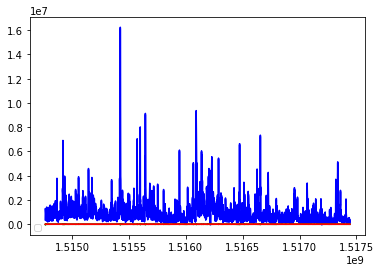

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2018, 2)
count    2688.000000
mean       -2.027215
std       614.245594
min     -5797.042704
25%      -244.187068
50%       -40.231481
75%       183.525930
max      9210.450155
Name: velocity, dtype: float64
count    2688.000000
mean        0.002739
std         0.940530
min       -12.207741
25%        -0.333680
50%        -0.002989
75%         0.361998
max        13.191720
Name: acceleration, dtype: float64


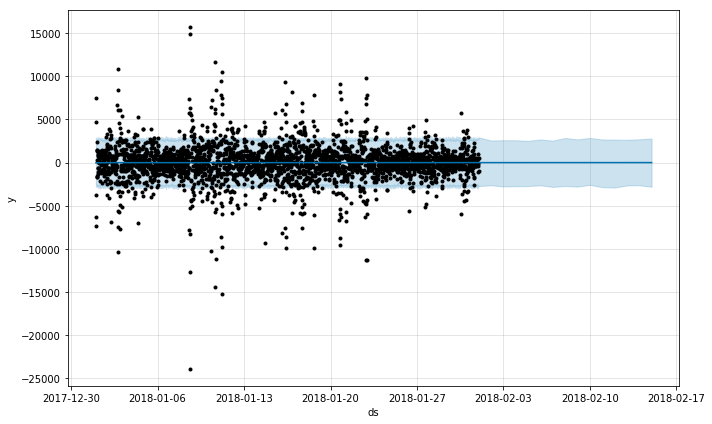

ValueError: view limit minimum -75219545.25 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

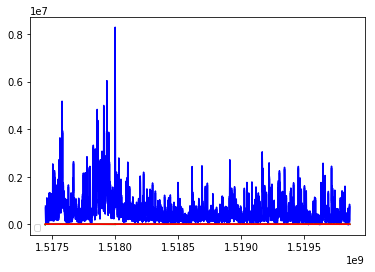

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2018, 3)
count    2976.000000
mean       -0.729764
std      1392.279862
min     -8343.870897
25%      -674.412209
50%         1.467860
75%       668.692128
max      7000.173645
Name: velocity, dtype: float64
count    2976.000000
mean        0.000937
std         2.993021
min       -14.930610
25%        -1.525801
50%        -0.013790
75%         1.442964
max        16.113502
Name: acceleration, dtype: float64


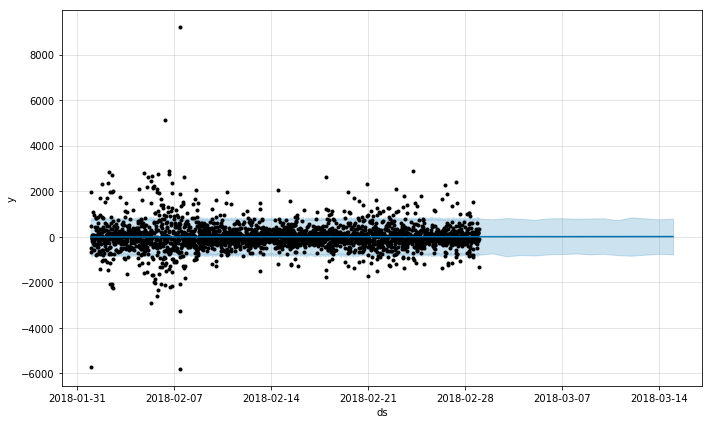

ValueError: view limit minimum -75353432.7 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

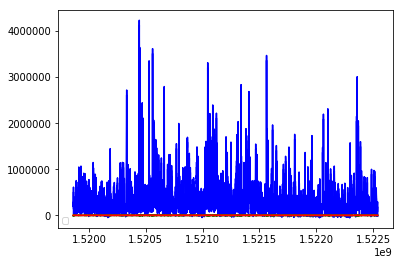

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2018, 4)
count    2880.000000
mean       -0.450356
std      1481.382859
min     -7231.635317
25%      -791.719864
50%        -5.576571
75%       788.107799
max      7241.587030
Name: velocity, dtype: float64
count    2880.000000
mean        0.000412
std         3.244815
min       -15.247593
25%        -1.721577
50%         0.005803
75%         1.708397
max        15.990925
Name: acceleration, dtype: float64


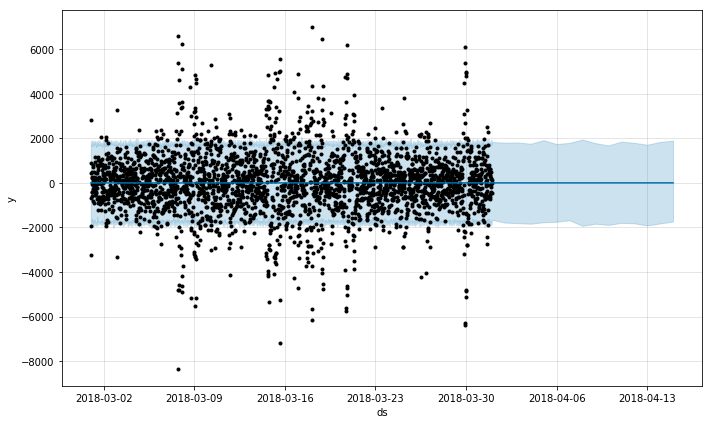

ValueError: view limit minimum -75483003.3 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

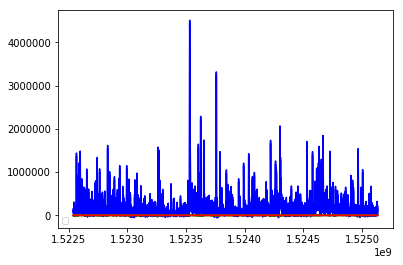

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2018, 5)
count    2976.000000
mean       -0.366512
std       490.139706
min     -3995.705274
25%      -194.748169
50%         9.438308
75%       209.814311
max      3184.959559
Name: velocity, dtype: float64
count    2976.000000
mean        0.000592
std         1.112927
min        -7.132017
25%        -0.463846
50%         0.001930
75%         0.442346
max         8.635383
Name: acceleration, dtype: float64


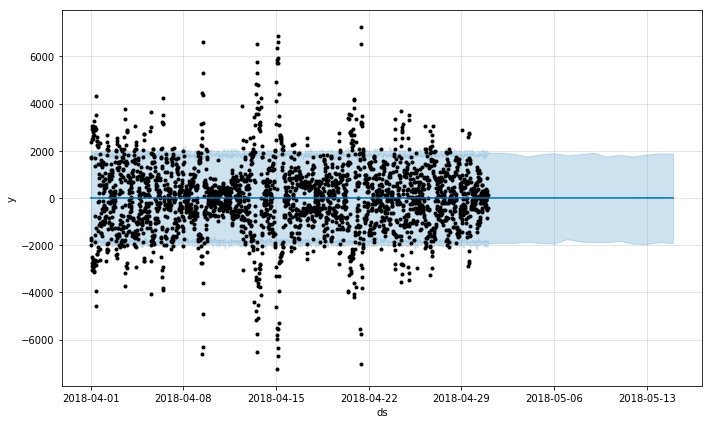

ValueError: view limit minimum -75616890.75 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

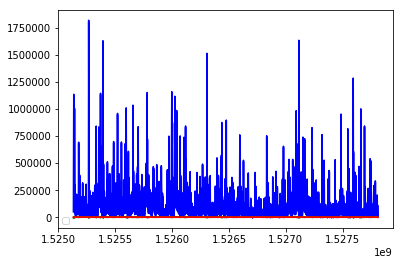

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2018, 6)
count    2880.000000
mean        0.452086
std       439.690780
min     -4590.318595
25%      -107.090169
50%         5.454844
75%       115.476867
max      3089.321143
Name: velocity, dtype: float64
count    2880.000000
mean        0.000123
std         0.970988
min        -8.097505
25%        -0.257027
50%        -0.005052
75%         0.233460
max         8.849030
Name: acceleration, dtype: float64


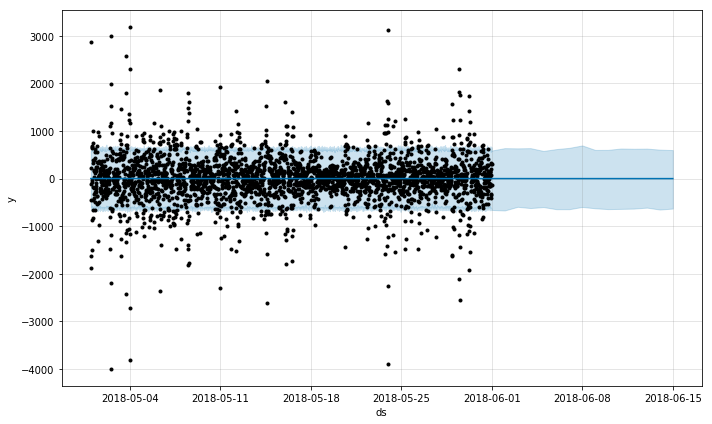

ValueError: view limit minimum -75746459.25 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

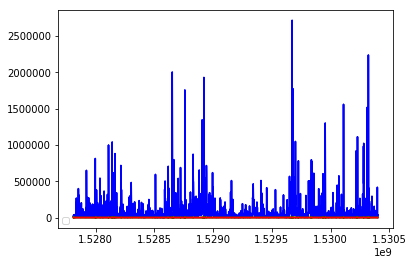

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2018, 7)
count    2976.000000
mean       -0.375438
std       282.017199
min     -3360.902063
25%       -57.025064
50%        -4.283511
75%        48.805287
max      6743.218576
Name: velocity, dtype: float64
count    2976.000000
mean        0.000538
std         0.507704
min        -6.953674
25%        -0.107935
50%        -0.004653
75%         0.100728
max         7.429179
Name: acceleration, dtype: float64


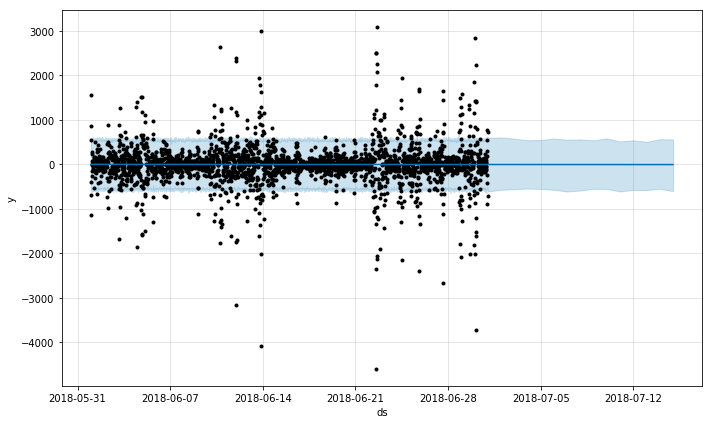

ValueError: view limit minimum -75880346.7 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

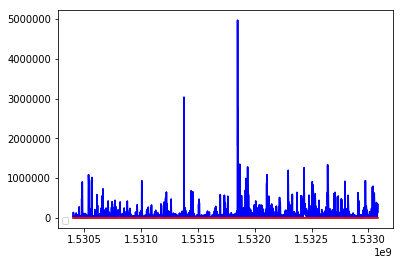

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2018, 8)
count    2976.000000
mean       -0.482257
std       256.166900
min     -3482.740096
25%       -62.096838
50%         0.938758
75%        65.189291
max      3399.510732
Name: velocity, dtype: float64
count    2976.000000
mean        0.000712
std         0.538395
min        -5.746261
25%        -0.130252
50%        -0.004387
75%         0.134528
max         7.319997
Name: acceleration, dtype: float64


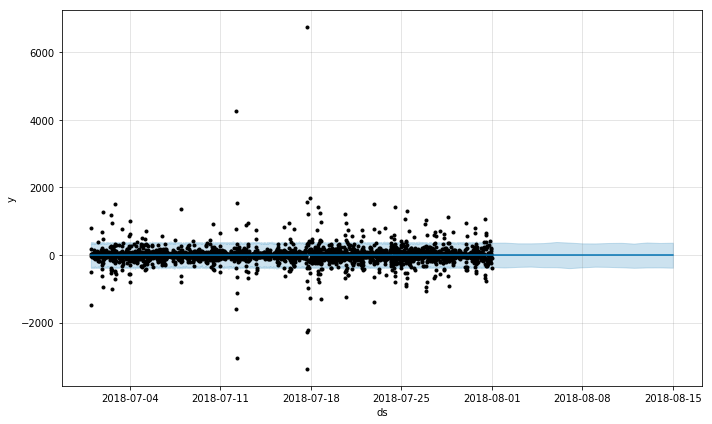

ValueError: view limit minimum -76014235.2 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

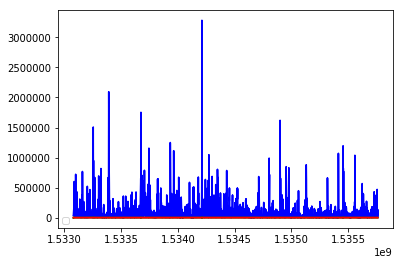

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


(2018, 9)
count     1939.000000
mean        -1.524846
std       2946.438052
min     -10962.112146
25%      -1297.374559
50%         -7.846330
75%       1286.433858
max      11054.208184
Name: velocity, dtype: float64
count    1939.000000
mean       -0.006854
std         6.544729
min       -24.153390
25%        -2.862543
50%        -0.010265
75%         2.861733
max        24.498049
Name: acceleration, dtype: float64


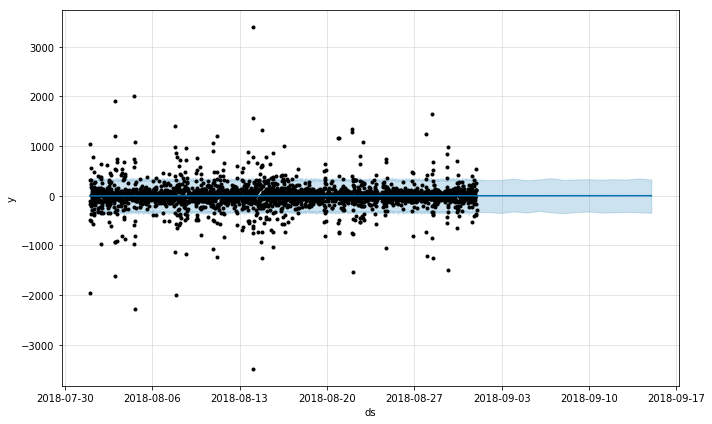

ValueError: view limit minimum -76101457.65 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

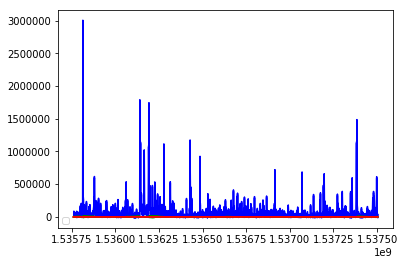

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


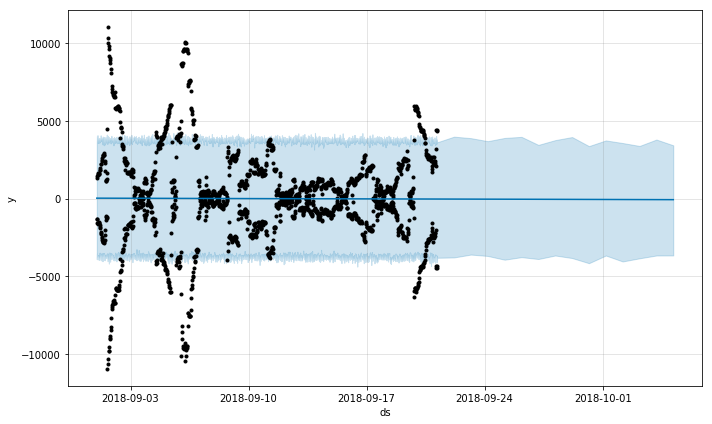

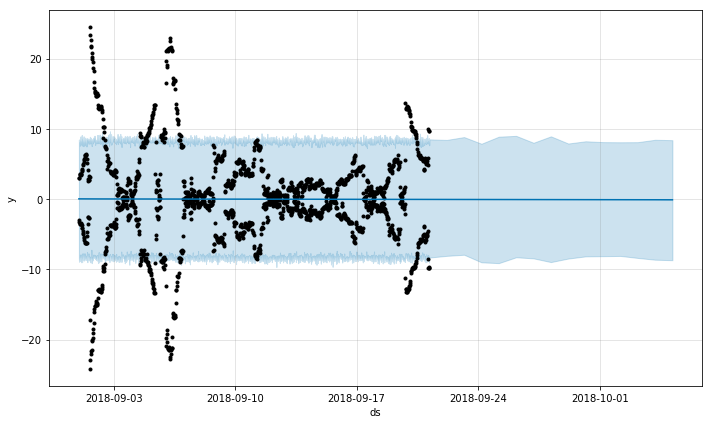

In [74]:
#monthly
d = dict(tuple(df.groupby((df.ds.dt.year, df.ds.dt.month))))
for i, df_month in d.items():
    print(i)
    run(df_month)

# Mean Inertia

In [40]:
prophet = Prophet(seasonality_mode='multiplicative')
df['ds'] = pd.to_datetime(df['date'], unit='s')
df['y'] = x_mean[:,1]

In [41]:
prophet.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [44]:
#Build future, periods set to 30 because there are 30 days of data
future = prophet.make_future_dataframe(periods=180)
#Build Forecast
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
60062,2019-03-16 03:00:00,-0.422318,-917.796189,887.881102
60063,2019-03-17 03:00:00,-0.423418,-888.330214,922.084136
60064,2019-03-18 03:00:00,-0.424610,-838.290453,883.900778
60065,2019-03-19 03:00:00,-0.425721,-951.155351,920.122168
60066,2019-03-20 03:00:00,-0.426915,-882.904050,850.854745


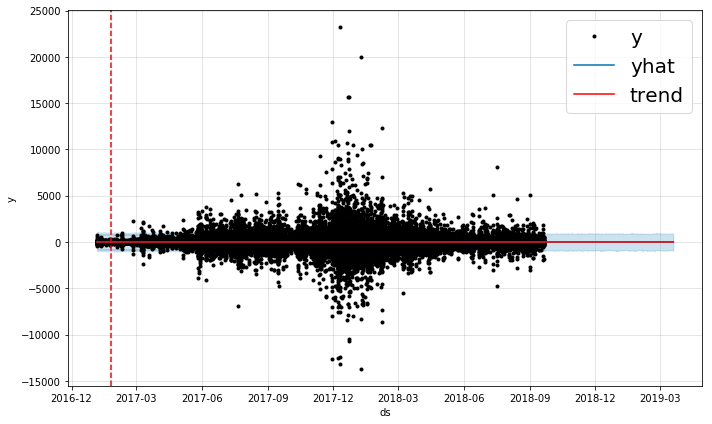

In [45]:
#Build the plot to show the forecasted data
vol = prophet.plot(forecast)
a = add_changepoints_to_plot(vol.gca(), prophet, forecast)
plt.legend(loc='best', fontsize=20)

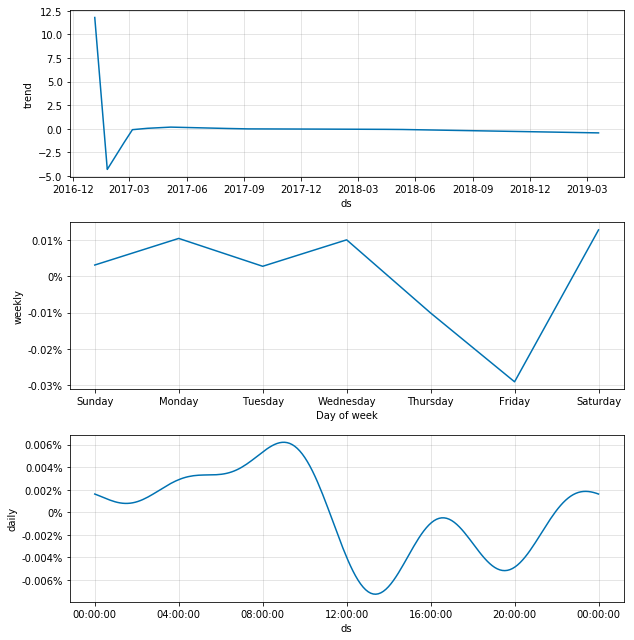

In [46]:
fig2 = prophet.plot_components(forecast,uncertainty=False)

# STD Inertia

In [58]:
prophet = Prophet(seasonality_mode='multiplicative')
df['ds'] = pd.to_datetime(df['date'], unit='s')
df['y'] = x_std[:,2]

In [59]:
prophet.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [56]:
#Build future, periods set to 30 because there are 30 days of data
future = prophet.make_future_dataframe(periods=180)
#Build Forecast
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
60062,2019-03-16 03:00:00,-0.000849,-1.612588,1.535833
60063,2019-03-17 03:00:00,-0.000852,-1.554833,1.589817
60064,2019-03-18 03:00:00,-0.000854,-1.558891,1.526936
60065,2019-03-19 03:00:00,-0.000856,-1.734104,1.468109
60066,2019-03-20 03:00:00,-0.000859,-1.552938,1.536730


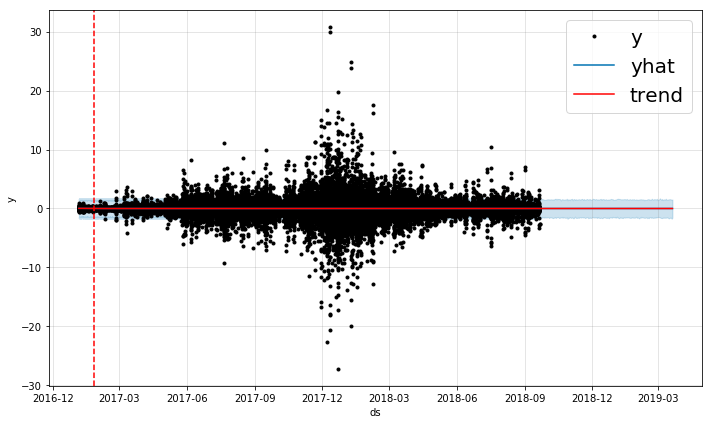

In [57]:
#Build the plot to show the forecasted data
vol = prophet.plot(forecast)
a = add_changepoints_to_plot(vol.gca(), prophet, forecast)
plt.legend(loc='best', fontsize=20)

# Mean Acceleration

In [50]:
prophet = Prophet(seasonality_mode='multiplicative')
df['ds'] = pd.to_datetime(df['date'], unit='s')
df['y'] = x_mean[:,2]

In [51]:
prophet.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [52]:
#Build future, periods set to 30 because there are 30 days of data
future = prophet.make_future_dataframe(periods=180)
#Build Forecast
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
60062,2019-03-16 03:00:00,-0.000849,-1.523663,1.499760
60063,2019-03-17 03:00:00,-0.000852,-1.400523,1.554514
60064,2019-03-18 03:00:00,-0.000854,-1.493730,1.549719
60065,2019-03-19 03:00:00,-0.000856,-1.553284,1.611305
60066,2019-03-20 03:00:00,-0.000859,-1.513655,1.565813


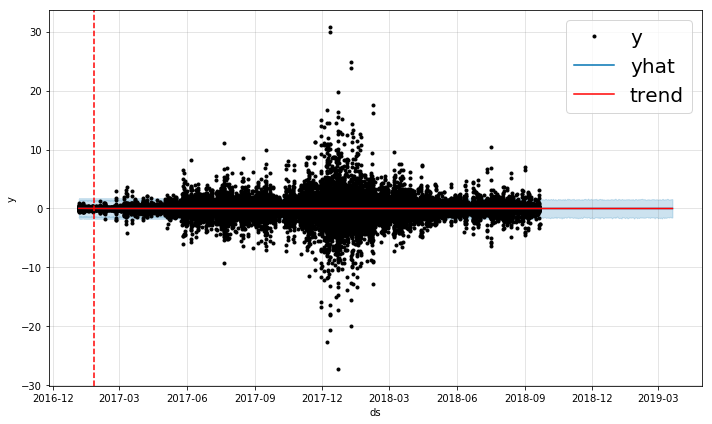

In [53]:
#Build the plot to show the forecasted data
vol = prophet.plot(forecast)
a = add_changepoints_to_plot(vol.gca(), prophet, forecast)
plt.legend(loc='best', fontsize=20)

# STD Acceleration

In [60]:
prophet = Prophet(seasonality_mode='multiplicative')
df['ds'] = pd.to_datetime(df['date'], unit='s')
df['y'] = x_std[:,2]

In [61]:
prophet.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [62]:
#Build future, periods set to 30 because there are 30 days of data
future = prophet.make_future_dataframe(periods=180)
#Build Forecast
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
60062,2019-03-16 03:00:00,1.022806,0.996789,1.048270
60063,2019-03-17 03:00:00,1.022781,0.996806,1.049158
60064,2019-03-18 03:00:00,1.022802,0.995585,1.047326
60065,2019-03-19 03:00:00,1.022781,0.994692,1.049415
60066,2019-03-20 03:00:00,1.022812,0.995590,1.049061


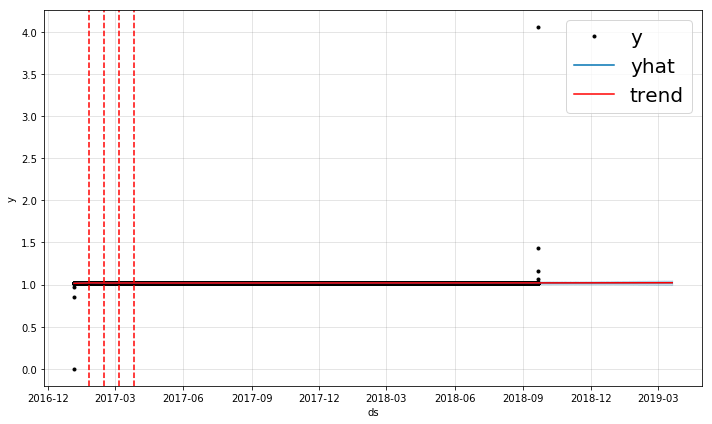

In [72]:
#Build the plot to show the forecasted data
vol = prophet.plot(forecast)
a = add_changepoints_to_plot(vol.gca(), prophet, forecast)
plt.legend(loc='best', fontsize=20)

# June - October Analysis

In [47]:
df3 = df.loc[50000:60000]

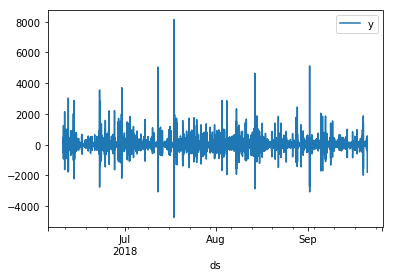

In [48]:
df3.plot(x='ds', y = 'y')

/anaconda3/lib/python3.6/site-packages/pykalman/utils.py:111: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  args = inspect.getargspec(obj.__init__)[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    9.887000e+03
mean     5.674023e-07
std      4.500895e-05
min     -3.620801e-04
25%     -4.302291e-17
50%     -6.359121e-18
75%      5.688407e-17
max      4.153153e-03
Name: velocity, dtype: float64
count    9.887000e+03
mean     7.354882e-10
std      4.300111e-08
min     -1.037063e-07
25%     -2.330809e-20
50%     -4.973123e-21
75%      4.493196e-20
max      2.813033e-06
Name: acceleration, dtype: float64


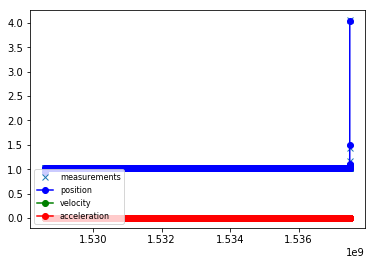

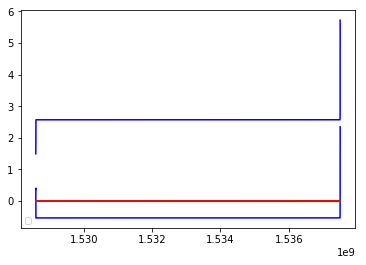

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


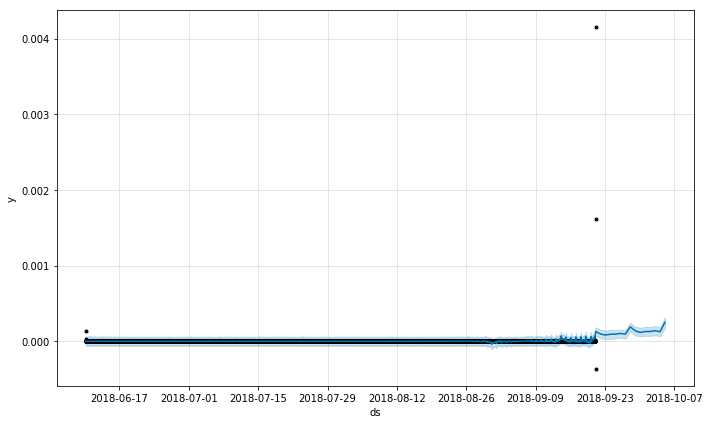

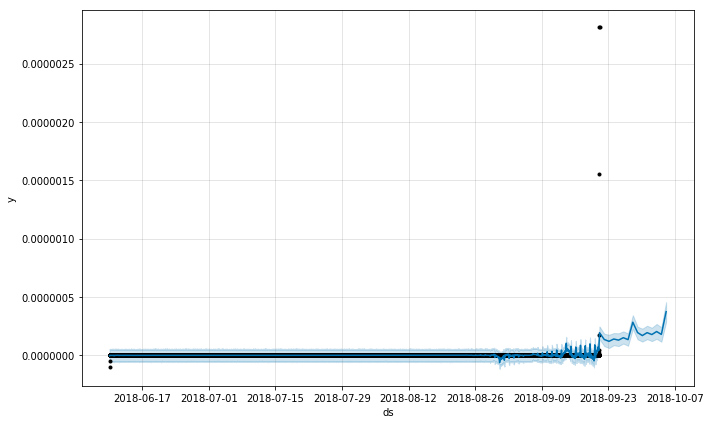

In [73]:
run(df3)